In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import models
from PIL import Image
import json

In [3]:
warnings.filterwarnings("ignore")

In [1]:
# sample folder
import cv2
import json
import random
import shutil
import os

path = "..\\z20_data\\food_sample"

food_sample_folder = os.listdir(path)

image_folders = []
json_folders = []

all_images = []
new_jsons = []

for i, folder_name in enumerate(food_sample_folder):
    image_folders.append(folder_name)
    image = os.listdir(path+'/'+folder_name) 
    folder_path = os.path.join(path,folder_name)

    for j, file_name in enumerate(image): 
        file = os.path.join(folder_path,file_name)
        all_images.append(file)

print(all_images)
print(image_folders)

['..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00865.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00866.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00867.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00868.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00869.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00870.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00871.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00872.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00873.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00874.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00875.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00876.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00877.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00878.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00879.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00880.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00881.jp

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    zoom_range = 0.2,
    shear_range = 30,
    horizontal_flip = True,
    featurewise_center=True,
    validation_split=0.2

    )

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(256,256),
    class_mode='sparse',
    batch_size = 32,
    shuffle = False,
    subset = 'training'
    
    )  

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=(256,256),
    class_mode='sparse',
    batch_size = 32,
    shuffle = False,
    subset = 'validation'

)

print(train_generator.class_indices)

Found 61600 images belonging to 30 classes.
Found 15386 images belonging to 30 classes.
{'blt샌드위치': 0, '갈비탕': 1, '과일채소샐러드': 2, '달걀찜': 3, '닭갈비': 4, '된장찌개': 5, '떡볶이': 6, '메쉬드포테이토': 7, '모듬초밥': 8, '배추김치': 9, '베이글샌드위치': 10, '보쌈': 11, '복숭아': 12, '볶음면': 13, '볶음밥': 14, '부침개': 15, '비빔밥': 16, '빵': 17, '쇠고기구이': 18, '순대': 19, '순두부찌개': 20, '스파게티': 21, '쌀국수': 22, '아이스라떼': 23, '어묵탕': 24, '짜장면': 25, '짬뽕': 26, '콩나물': 27, '후라이드치킨': 28, '훈제오리': 29}


In [6]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

IMAGE_SIZE = [256,256]

train_samples = 61600
validation_samples = 15386

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(56, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)  
checkpointer = keras.callbacks.ModelCheckpoint(filepath='inceptionV3.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_inceptionV3.log')
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

NameError: name 'keras' is not defined

In [ ]:
model.save('Model_InceptionV3.h5')

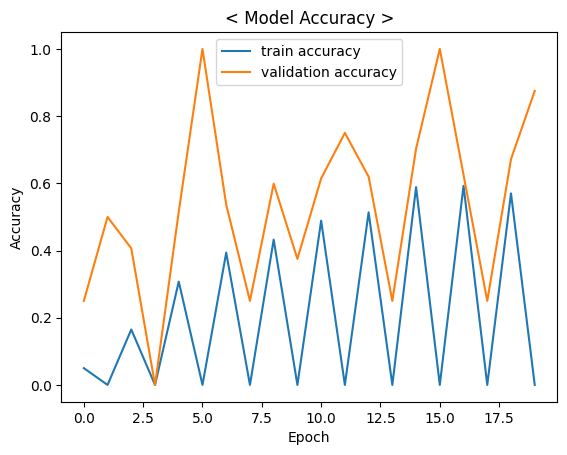

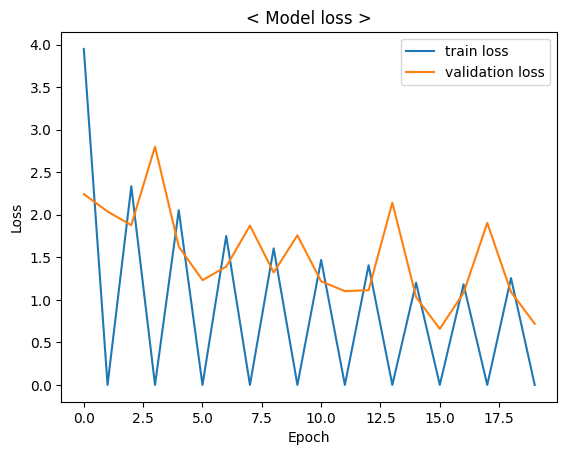

In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('< Model Accuracy >')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_InceptionV3')
    plt.show()
    
def plot_loss(history):
    plt.plot(history.history['loss'], label="train loss")
    plt.plot(history.history['val_loss'], label="validation loss")
    plt.title('< Model loss >')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_InceptionV3')
    plt.show()

  
plot_accuracy(history)
plot_loss(history)

In [ ]:
from tensorflow.keras.optimizers import SGD

IMAGE_SIZE = [256,256]

train_samples = 61600
validation_samples = 15386

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(20, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy']
)  
checkpointer = keras.callbacks.ModelCheckpoint(filepath='inceptionV3_sgd.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_inceptionV3_sgd.log')
history_v3_sgd = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 639, in run_forever

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1985, in _run_once

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\user\AppData\Local\Temp\ipykernel_13296\544407528.py", line 30, in <module>

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 1722, in sparse_categorical_crossentropy

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 22 which is outside the valid range of [0, 20).  Label values: 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_89255]

In [ ]:
model.save('Model_InceptionV3_sgd.h5')

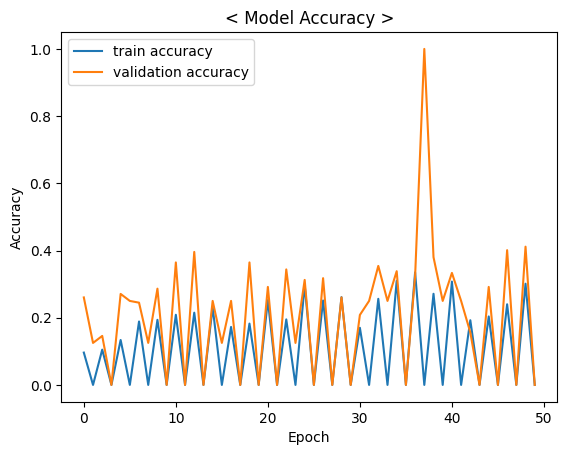

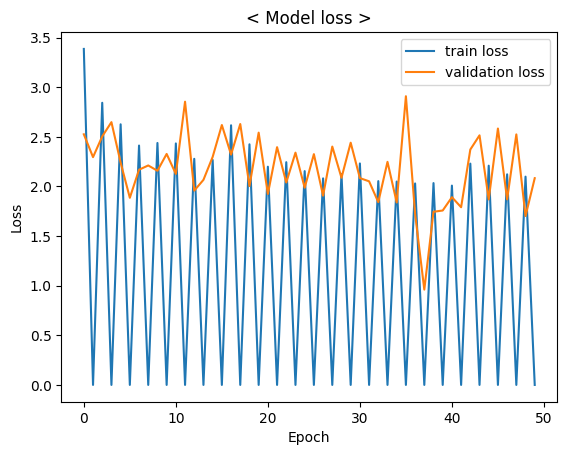

In [ ]:
plot_accuracy(history_v3_sgd)
plot_loss(history_v3_sgd)

In [ ]:
from keras.applications import DenseNet161

IMAGE_SIZE = [256,256]

train_samples = 61600
validation_samples = 15386

densenet = DenseNet161(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3]
)


for layer in densenet.layers:
    layer.trainable = False

x = densenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(20, activation='softmax')(x)

model = Model(inputs=densenet.input, outputs=prediction)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy']
)  
checkpointer = keras.callbacks.ModelCheckpoint(filepath='densenet_sgd.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_densenet_sgd.log')
history_dense = model.fit(
    train_generator,
    batch_size=32,
    epochs=50,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

In [ ]:
model.save('Model_densenet_sgd.h5')

In [ ]:
plot_accuracy(history_dense)
plot_loss(history_dense)

In [ ]:
from keras.applications.resnet50 import ResNet50

resnet = ResNet50(include_top=False, weights="imagenet", input_shape=IMAGE_SIZE + [3])

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)


prediction = Dense(20, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy']
)  
checkpointer = keras.callbacks.ModelCheckpoint(filepath='densenet_sgd.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_densenet_sgd.log')
history_resnet = model.fit(
    train_generator,
    batch_size=32,
    epochs=50,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

In [ ]:
model.save('Model_resnet_sgd.h5')

In [ ]:
plot_accuracy(history_resnet)
plot_loss(history_resnet)